# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedSet
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

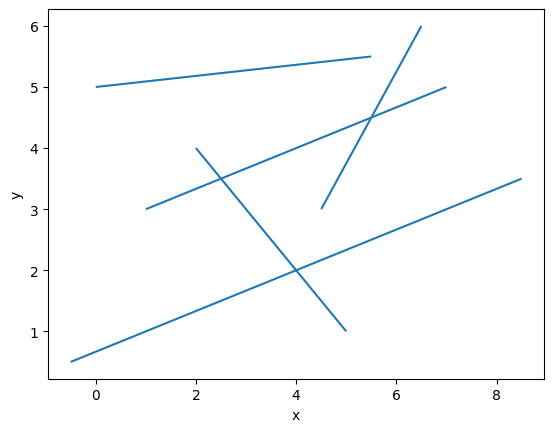

In [3]:
%matplotlib inline
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

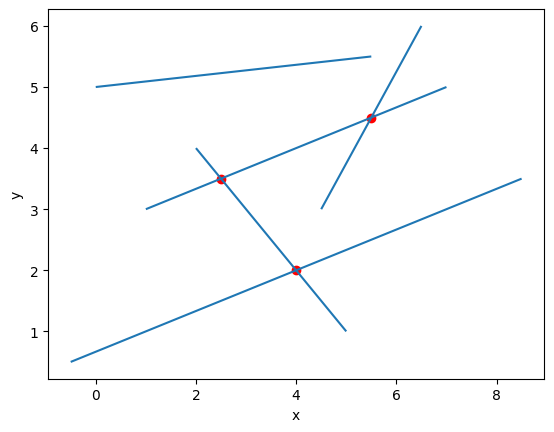

In [4]:
%matplotlib inline
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    lines = []
    used_x = set()
    for i in range(n):
        x1 = np.random.uniform(0,max_x)
        if x1 in used_x:
            continue
        x2 = np.random.uniform(0,max_x)
        if x2 in used_x or x1 == x2:
            continue
        used_x.add(x1)
        used_x.add(x2)
        y1 = np.random.uniform(0,max_y)
        y2 = np.random.uniform(0,max_y)
        lines.append(((x1,y1),(x2,y2)))
    return lines

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.281s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
lines_a = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

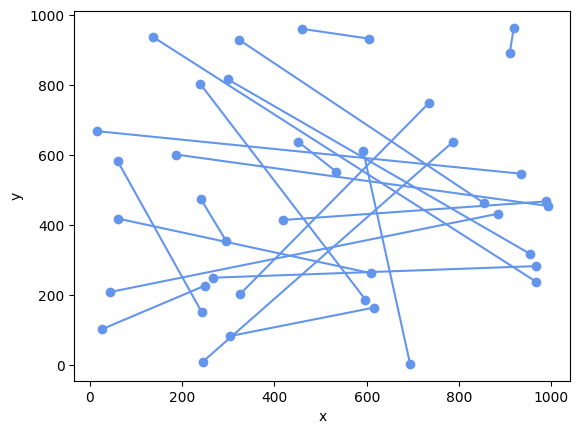

In [8]:
def visualise_lines(lines):
    vis = Visualizer()
    
    for line in lines:
        vis.add_point(line, color = "cornflowerblue")
        vis.add_line_segment(line, color = "cornflowerblue")
        #vis.add_point(line[0])
        #vis.add_point(line[1])
    vis.show()
%matplotlib inline
visualise_lines(lines_a)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

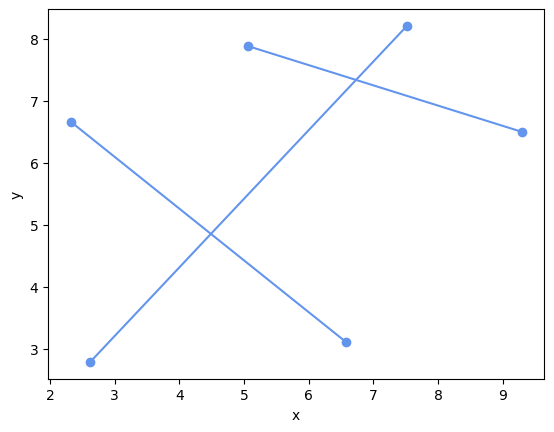

In [9]:
%matplotlib tk

my_points = []
used_x = set()
activate = True


def draw_line(point1, point2):
    x = [point1[0],point2[0]]
    y = [point1[1],point2[1]]
    plt.plot(x,y,color="cornflowerblue")
    plt.draw()

def draw_point(point):
    plt.scatter(point[0],point[1],color="cornflowerblue")
    plt.draw()

def click(event):
    global activate
    if event:
        if event.button == 1:
            x, y = event.xdata, event.ydata
            if x is None or y is None:
                return
            if x in used_x:
                ax.set_title("Współrzędne x nie moga sie powtarzac")
                plt.pause(1)
                ax.set_title("Lewy przycisk: pierwszy raz aby zacząć odcinek, drugi raz aby zakończyć,  Prawy przycisk: zakończ dodawanie odcinków")
            else:
                my_points.append((x,y))
                used_x.add(x)
                draw_point((x,y))
                if len(my_points)%2==0:
                    draw_line(my_points[-1],my_points[-2])
        elif event.button == 3 and len(my_points)%2==0 and len(my_points)>1:
            activate = False
            plt.draw()
            plt.pause(2)
            plt.close()

fig, ax = plt.subplots()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_title("Lewy przycisk: pierwszy raz aby zacząć odcinek, drugi raz aby zakończyć,  Prawy przycisk: zakończ dodawanie odcinków")

fig.canvas.mpl_connect("button_press_event", click)

plt.show(block = True)

my_lines = [(my_points[0],my_points[1])]

for i in range(2,len(my_points),2):
    my_lines.append((my_points[i],my_points[i+1]))

%matplotlib inline
visualise_lines(my_lines)

Uzupełnij funkcję ```is_intersection```

In [ ]:
def intersects(section1, section2, eps=1e-9):
    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

    def on_segment(A, B, C):
        return (
            min(A[0], B[0]) - eps <= C[0] <= max(A[0], B[0]) + eps and
            min(A[1], B[1]) - eps <= C[1] <= max(A[1], B[1]) + eps
        )

    (x1, y1), (x2, y2) = section1
    (x3, y3), (x4, y4) = section2

    A, B, C, D = (x1, y1), (x2, y2), (x3, y3), (x4, y4)

    d1 = ccw(A, C, D)
    d2 = ccw(B, C, D)
    d3 = ccw(A, B, C)
    d4 = ccw(A, B, D)

    # Przecięcie odcinków
    if d1 != d2 and d3 != d4:
        det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
        if abs(det) < eps:  # Współliniowe odcinki
            return None
        px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / det
        py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / det
        return (px, py)

    # Współliniowe odcinki
    if d1 == d2 == d3 == d4:
        if on_segment(A, B, C): return C
        if on_segment(A, B, D): return D
        if on_segment(C, D, A): return A
        if on_segment(C, D, B): return B

    return None

In [11]:
def is_intersection(sections):
    T = SortedSet()
    Q = SortedSet()

    for i, section in enumerate(sections):
        point1, point2 = section
        if point1[0] > point2[0]:
            point1, point2 = point2, point1
        Q.add((point1, 'start', i))
        Q.add((point2, 'end', i))

    for point, event_type, index in Q:
        if event_type == 'start':
            T.add(index)
            idx = T.index(index)
            new_neighbours = []
            if idx > 0:
                neighbour = T[idx - 1]
                new_neighbours.append((neighbour, index))
            if idx < len(T) - 1:
                neighbour = T[idx + 1]
                new_neighbours.append((neighbour, index))
        else:
            idx = T.index(index)
            new_neighbours = []
            if idx > 0 and idx < len(T) - 1:
                left = T[idx - 1]
                right = T[idx + 1]
                new_neighbours.append((left, right))

            T.remove(index)
        for (s1, s2) in new_neighbours:
            if intersects(sections[s1], sections[s2]):
                return True
    return False
print(is_intersection(my_lines))

True


In [12]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Zbiór zdarzeń (Q):

•	Zawiera listę punktów zdarzeń składającą się z punktów początkowych i końcowych wszystkich odcinków.

•	Każdy punkt zdarzenia zawiera informacje o:

    o	Typie punktu: początek (lewy) lub koniec (prawy) odcinka.
    
    o	Współrzędne punktu oraz identyfikator odcinka, do którego należy.

Zbiór aktywnych odcinków (T):

•	Utrzymuje dynamiczną listę odcinków, które aktualnie przecina pionową prostą zamiatającą.


Struktury te zaimplementowałem jako SortedSet z pakietu sortedcontainers przez co nie było już potrzeby sortowania punktów po współrzędnych oraz struktura umożliwia dodawanie i usuwanie odcinków w czasie logarytmicznym.

Uzupełnij funkcję ```is_intersection_with_visualization```

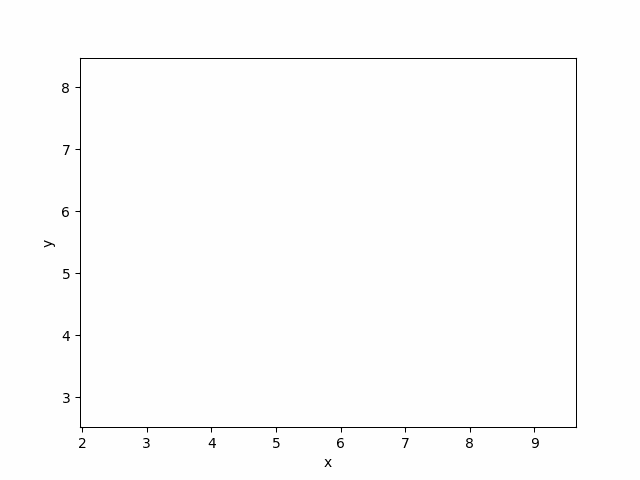

In [13]:
vis = Visualizer()

def is_intersection_with_visualization(sections):
    T = SortedSet()
    Q = SortedSet()
    vis.add_line_segment(sections)
    min_y, max_y = float('inf'), -float('inf')
    for i in range(len(sections)):
        vis.add_point(sections[i][0], color = "blue")
        vis.add_point(sections[i][1], color = "blue")
        min_y = min(min_y, sections[i][1][1])
        max_y = max(max_y, sections[i][1][1])

    for i, section in enumerate(sections):
        point1, point2 = section
        if point1[0] > point2[0] or (point1[0] == point2[0] and point1[1] > point2[1]):
            point1, point2 = point2, point1
        Q.add((point1, 'start', i))
        Q.add((point2, 'end', i))

    for point, event_type, index in Q:
        broom=vis.add_line(((point[0],min_y),(point[0],max_y)),color="red")
        if event_type == 'start':
            T.add(index)
            vis.add_point(point,color="green",s=25)
            vis.add_line_segment(sections[index],color="green")
            vis.add_point(sections[index][1],color="green",s=25)
            idx = T.index(index)
            new_neighbours = []
            if idx > 0:
                neighbour = T[idx - 1]
                new_neighbours.append((neighbour, index))
            if idx < len(T) - 1:
                neighbour = T[idx + 1]
                new_neighbours.append((index, neighbour))

            for s1, s2 in new_neighbours:
                if intersects(sections[s1], sections[s2]):
                    vis.add_point(intersects(sections[s1], sections[s2]),color="red",s=35)
                    return True, vis
        else:
            vis.add_point(point,color="brown",s=25)
            vis.add_line_segment(sections[index],color="brown")
            vis.add_point(sections[index][0],color="brown",s=25)
            idx = T.index(index)
            new_neighbours = []
            if idx > 0 and idx < len(T) - 1:
                left = T[idx - 1]
                right = T[idx + 1]
                new_neighbours.append((left, right))

            T.remove(index)
        for s1, s2 in new_neighbours:
            point_one=vis.add_point(sections[s1][0],color="yellow",s=25)
            point_two=vis.add_point(sections[s1][1],color="yellow",s=25)
            section_one=vis.add_line_segment(sections[s1],color="yellow")
            point_three=vis.add_point(sections[s2][0],color="yellow",s=25)
            point_four=vis.add_point(sections[s2][1],color="yellow",s=25)
            section_two=vis.add_line_segment(sections[s2],color="yellow")
            if intersects(sections[s1], sections[s2]):
                vis.add_point(intersects(sections[s1], sections[s2]),color="red",s=35)
                return True, vis
            vis.remove_figure(point_one)
            vis.remove_figure(point_two)
            vis.remove_figure(section_one)
            vis.remove_figure(point_three)
            vis.remove_figure(point_four)
            vis.remove_figure(section_two)
        vis.remove_figure(broom)
    return False, vis

vis.clear()
%matplotlib inline
vis = is_intersection_with_visualization(my_lines)[1]
vis.show_gif(interval=200)


Uzupełnij funkcję ```find_intersections```

In [15]:
def find_intersections(sections):
    T = SortedSet()
    Q = SortedSet()
    intersections = set()

    for i, section in enumerate(sections):
        point1, point2 = section
        if point1[0] > point2[0] or (point1[0] == point2[0] and point1[1] > point2[1]):
            point1, point2 = point2, point1
        Q.add((point1, 'start', i))
        Q.add((point2, 'end', i))

    for x, event_type, index in Q:

        if event_type == 'start':
            T.add(index)
            idx = T.index(index)
            new_neighbours = []
            if idx > 0:
                neighbour = T[idx - 1]
                new_neighbours.append((neighbour, index))
            if idx < len(T) - 1:
                neighbour = T[idx + 1]
                new_neighbours.append((index, neighbour))

            for s1, s2 in new_neighbours:
                if intersects(sections[s1], sections[s2]):
                    intersections.add((intersects(sections[s1], sections[s2]), s1 + 1, s2 + 1))
                    Q.add((intersects(sections[s1], sections[s2]), "intersection", (s1,s2)))

        elif event_type == 'end':
            idx = T.index(index)
            new_neighbours = []
            if idx > 0 and idx < len(T) - 1:
                left = T[idx - 1]
                right = T[idx + 1]
                new_neighbours.append((left, right))
            T.remove(index)

            for s1, s2 in new_neighbours:
                if intersects(sections[s1], sections[s2]):
                    intersections.add((intersects(sections[s1], sections[s2]), s1 + 1, s2 + 1))
                    Q.add((intersects(sections[s1], sections[s2]), "intersection", (s1,s2)))

        elif event_type == 'intersection':
            s1, s2 = index

            if T.index(s1) > T.index(s2):
                s1, s2 = s2, s1

            T.remove(s1)
            T.remove(s2)
            T.add(s1)
            T.add(s2)
            
            idx1, idx2 = T.index(s1), T.index(s2)
            if idx1 > 0:
                left = T[idx1 - 1]
                if intersects(sections[left], sections[s1]):
                    intersections.add((intersects(sections[left], sections[s1]), left + 1, s1 + 1))
                    Q.add((intersects(sections[left], sections[s1]), "intersection", (left,s1)))

            if idx2 < len(T) - 1:
                right = T[idx2 + 1]
                if intersects(sections[s2], sections[right]):
                    intersections.add((intersects(sections[s2], sections[right]), s2 + 1, right + 1))
                    Q.add((intersects(sections[s2], sections[right]), "intersection", (s2,right)))
    return list(intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

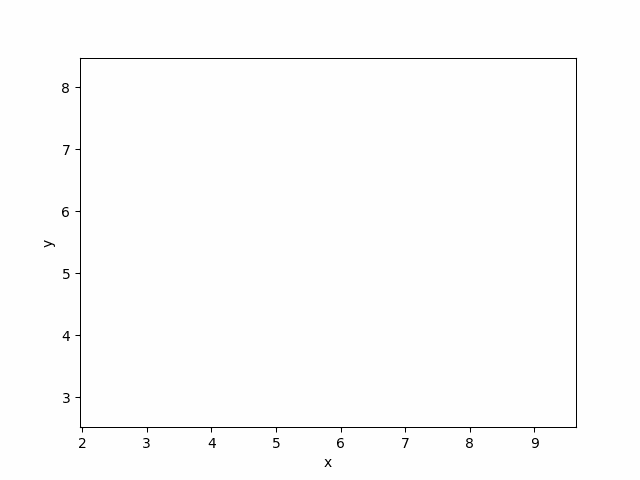

In [16]:
def find_intersections_with_visualization(sections):
    T = SortedSet()
    Q = SortedSet()
    intersections = set()
    intersections.clear()
    vis.add_line_segment(sections)
    min_y, max_y = float('inf'), -float('inf')
    for i in range(len(sections)):
        vis.add_point(sections[i][0], color = "blue")
        vis.add_point(sections[i][1], color = "blue")
        min_y = min(min_y, sections[i][1][1])
        max_y = max(max_y, sections[i][1][1])

    for i, section in enumerate(sections):
        point1, point2 = section
        if point1[0] > point2[0] or (point1[0] == point2[0] and point1[1] > point2[1]):
            point1, point2 = point2, point1
        Q.add((point1, 'start', i))
        Q.add((point2, 'end', i))

    for point, event_type, index in Q:
        broom=vis.add_line(((point[0],min_y),(point[0],max_y)),color="red")
        if event_type == 'start':
            T.add(index)
            vis.add_point(point,color="green",s=25)
            vis.add_line_segment(sections[index],color="green")
            vis.add_point(sections[index][1],color="green",s=25)
            idx = T.index(index)
            new_neighbours = []
            if idx > 0:
                neighbour = T[idx - 1]
                new_neighbours.append((neighbour, index))
            if idx < len(T) - 1:
                neighbour = T[idx + 1]
                new_neighbours.append((index, neighbour))

            for s1, s2 in new_neighbours:
                intersection = intersects(sections[s1], sections[s2])
                if intersection:
                    vis.add_point(intersection,color="red",s=35)
                    intersections.add((intersection, s1+1, s2+1))
                    Q.add((intersects(sections[s1], sections[s2]), "intersection", (s1,s2)))
        elif event_type == "end":
            vis.add_point(point,color="brown",s=25)
            vis.add_line_segment(sections[index],color="brown")
            vis.add_point(sections[index][0],color="brown",s=25)
            idx = T.index(index)
            new_neighbours = []
            if idx > 0 and idx < len(T) - 1:
                left = T[idx - 1]
                right = T[idx + 1]
                new_neighbours.append((left, right))
                intersection = intersects(sections[left], sections[right])
                if intersection:
                    intersections.add((intersection, left + 1, right + 1))
                    Q.add((intersection, "intersection", (left,right)))

            T.remove(index)
        elif event_type == 'intersection':
            s1, s2 = index

            if T.index(s1) > T.index(s2):
                s1, s2 = s2, s1

            T.remove(s1)
            T.remove(s2)
            T.add(s1)
            T.add(s2)
            
            idx1, idx2 = T.index(s1), T.index(s2)
            if idx1 > 0:
                left = T[idx1 - 1]
                if intersects(sections[left], sections[s1]):
                    intersections.add((intersects(sections[left], sections[s1]), left + 1, s1 + 1))
                    Q.add((intersects(sections[left], sections[s1]), "intersection", (left,s1)))

            if idx2 < len(T) - 1:
                right = T[idx2 + 1]
                if intersects(sections[s2], sections[right]):
                    intersections.add((intersects(sections[s2], sections[right]), s2 + 1, right + 1))
                    Q.add((intersects(sections[s2], sections[right]), "intersection", (s2,right)))


        for s1, s2 in new_neighbours:
            point_one=vis.add_point(sections[s1][0],color="yellow",s=25)
            point_two=vis.add_point(sections[s1][1],color="yellow",s=25)
            section_one=vis.add_line_segment(sections[s1],color="yellow")
            point_three=vis.add_point(sections[s2][0],color="yellow",s=25)
            point_four=vis.add_point(sections[s2][1],color="yellow",s=25)
            section_two=vis.add_line_segment(sections[s2],color="yellow")
            intersection = intersects(sections[s1], sections[s2])
            if intersection:
                vis.add_point(intersection,color="red",s=35)
                intersections.add((intersection, s1+1, s2+1))
            vis.remove_figure(point_one)
            vis.remove_figure(point_two)
            vis.remove_figure(section_one)
            vis.remove_figure(point_three)
            vis.remove_figure(point_four)
            vis.remove_figure(section_two)
        vis.remove_figure(broom)
        #vis.show()
    return intersections, vis
vis = Visualizer()
vis.clear()
%matplotlib inline
intersections, vis = find_intersections_with_visualization(my_lines)
vis.show_gif(interval=200)


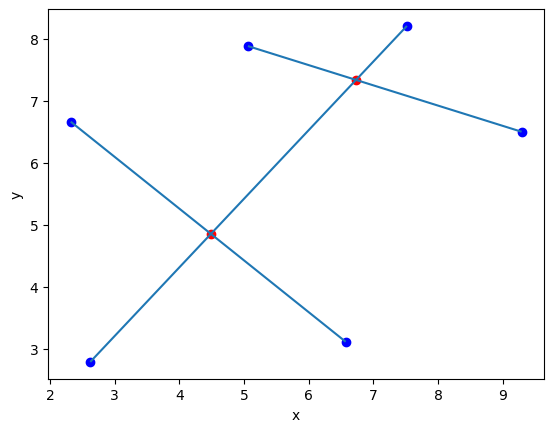

In [17]:
def print_intersections(sections, intersections):
    vis.clear()
    intersections = list(intersections)
    vis.add_line_segment(sections)
    for i in range(len(sections)):
        vis.add_point(sections[i][0], color = "blue")
        vis.add_point(sections[i][1], color = "blue")
    for i in range(len(intersections)):
        vis.add_point(intersections[i][0], color = "red")
    vis.show()
vis.clear()
print_intersections(my_lines, intersections)

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

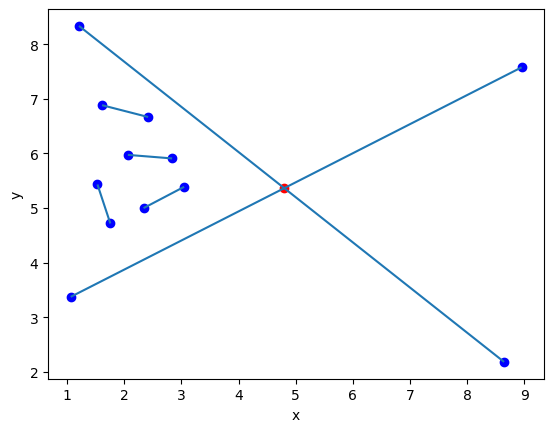

In [18]:
more_than_one_intersection = [((np.float64(1.2096774193548385), np.float64(8.333333333333332)), (np.float64(8.64516129032258), np.float64(2.1861471861471866))), ((np.float64(1.064516129032258), np.float64(3.3766233766233773)), (np.float64(8.951612903225806), np.float64(7.575757575757575))), ((np.float64(1.6129032258064515), np.float64(6.883116883116883)), (np.float64(2.4193548387096775), np.float64(6.666666666666667))), ((np.float64(2.064516129032258), np.float64(5.974025974025975)), (np.float64(2.8387096774193545), np.float64(5.909090909090909))), ((np.float64(2.338709677419355), np.float64(5.0)), (np.float64(3.0483870967741935), np.float64(5.38961038961039))), ((np.float64(1.532258064516129), np.float64(5.432900432900433)), (np.float64(1.7580645161290325), np.float64(4.718614718614719)))]
more_than_one_intersection_intersections = find_intersections(more_than_one_intersection)
print_intersections(more_than_one_intersection, more_than_one_intersection_intersections)